In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/traffic-prediction-dataset/traffic.csv


In [2]:
df=pd.read_csv('/kaggle/input/traffic-prediction-dataset/traffic.csv')

In [3]:
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [4]:
df.shape

(48120, 4)

In [5]:
df.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [7]:
df["DateTime"] = pd.to_datetime(df["DateTime"])

In [8]:
df = df.sort_values(by="DateTime") 

In [9]:
df["Vehicles"] = df["Vehicles"].interpolate(method="time") 

In [10]:
df.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [11]:
print("Unique values in 'Junction':", df['Junction'].unique())

Unique values in 'Junction': [1 2 3 4]


In [12]:
print("Unique values in 'Junction':", df['Vehicles'].unique())

Unique values in 'Junction': [ 15   6   9   7  13   5  10   1   2   3   4   8  11  12  17  16  20  19
  14  22  32  31  35  26  34  30  27  24  29  21  18  33  28  25  23  40
  38  36  48  43  41  37  39  42  44  47  50  45  46  71  51  70  54  52
  55  49  58  57  64  62  68 100  53  81  60  65  61  56  63  59  67  66
  76  79  98 114  84 134 105 111  69  86  73 132  80 109  77  74  72  78
  97  83  75  82  89  93  91  85  90 103  87  94  92 106  88  96 121 110
 120 102 133 125 104  95 112 143 135 141 156  99 124 113 115 180 173 101
 108 107 136 129 118 116 123 128 117 127 140 126 122 119 162]


In [13]:
df["hour"] = df["DateTime"].dt.hour
df["day"] = df["DateTime"].dt.day
df["month"] = df["DateTime"].dt.month
df["weekday"] = df["DateTime"].dt.weekday
df["is_weekend"] = df["weekday"].apply(lambda x: 1 if x >= 5 else 0)  # 1 if Saturday/Sunday

In [14]:
df.head()

,DateTime,Junction,Vehicles,ID,hour,day,month,weekday,is_weekend
0,2015-11-01 00:00:00,1,15,20151101001,0,1,11,6,1
14592,2015-11-01 00:00:00,2,6,20151101002,0,1,11,6,1
29184,2015-11-01 00:00:00,3,9,20151101003,0,1,11,6,1
29185,2015-11-01 01:00:00,3,7,20151101013,1,1,11,6,1
1,2015-11-01 01:00:00,1,13,20151101011,1,1,11,6,1


In [15]:
df["Vehicles_last_hour"] = df["Vehicles"].shift(1)
df["Vehicles_last_24_hours"] = df["Vehicles"].shift(24)  # 24-hour previous value
df["rolling_avg_7days"] = df["Vehicles"].rolling(window=7).mean()

In [16]:
df.dropna(inplace=True)  # Drop rows with NaN values due to shifting

In [17]:
df=df.drop(['ID'], axis=1)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

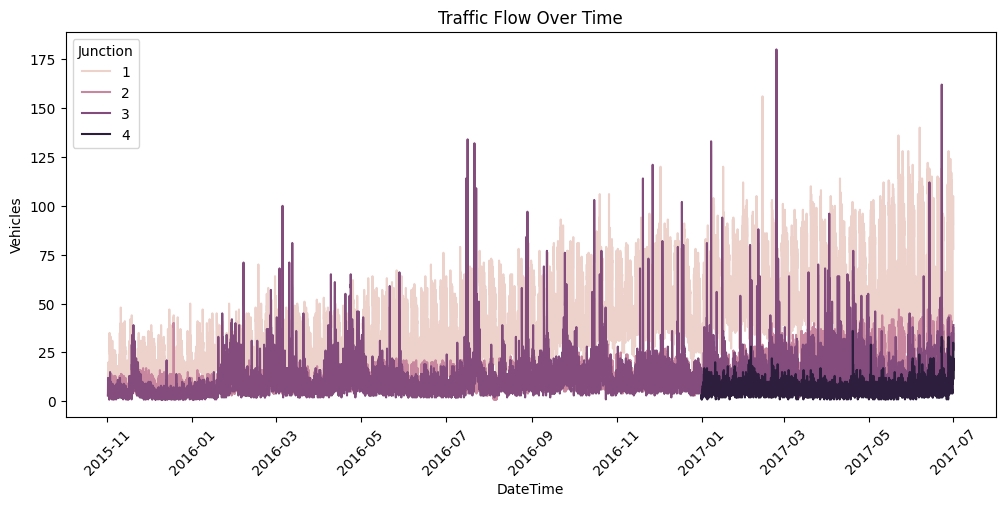

In [19]:
# Plot Traffic Trends Over Time
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x="DateTime", y="Vehicles", hue="Junction")
plt.title("Traffic Flow Over Time")
plt.xticks(rotation=45)
plt.show()

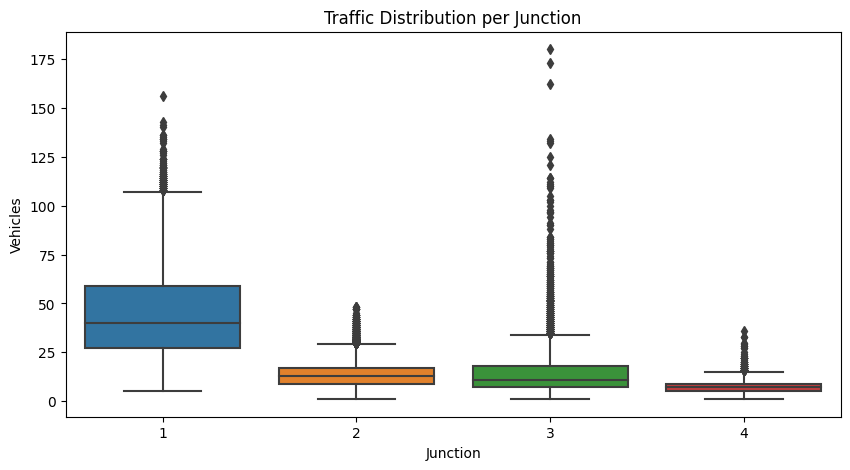

In [20]:
# Boxplot for detecting outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Junction", y="Vehicles")
plt.title("Traffic Distribution per Junction")
plt.show()

<ipython-input-21-12d82372e4c9>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="hour", y="Vehicles", estimator=np.mean, ci=None)


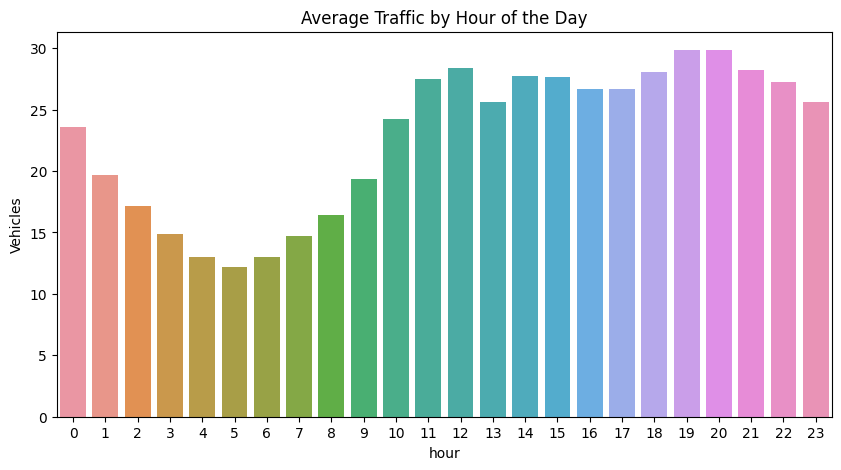

In [21]:
# Traffic by Hour of the Day
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="hour", y="Vehicles", estimator=np.mean, ci=None)
plt.title("Average Traffic by Hour of the Day")
plt.show()


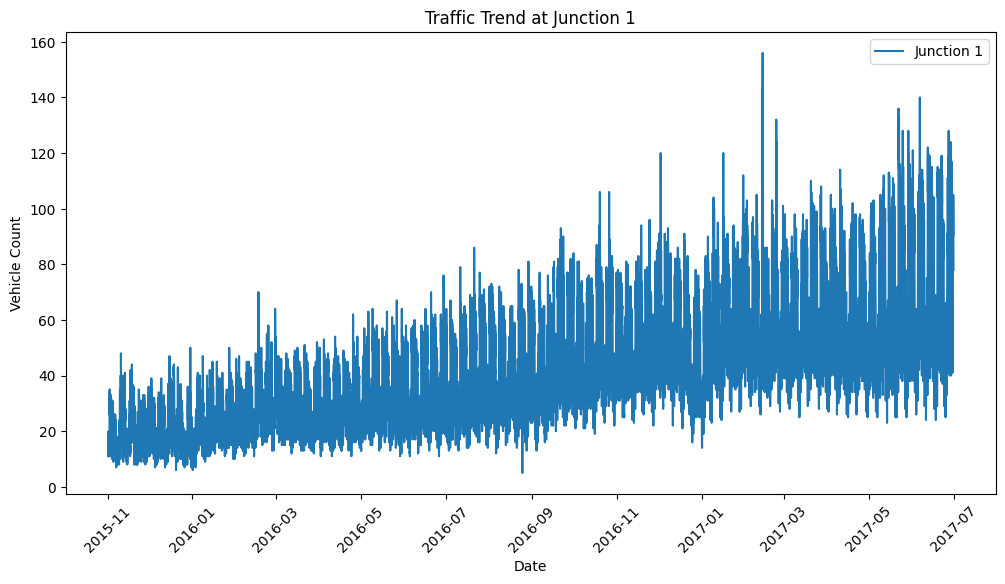

In [22]:
import matplotlib.pyplot as plt

df_junction_1 = df[df["Junction"] == 1]
plt.figure(figsize=(12, 6))
plt.plot(df_junction_1["DateTime"], df_junction_1["Vehicles"], label="Junction 1")
plt.xlabel("Date")
plt.ylabel("Vehicle Count")
plt.title("Traffic Trend at Junction 1")
plt.legend()
plt.xticks(rotation=45)
plt.show()


<ipython-input-23-832bf807068f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="weekday", y="Vehicles", estimator=np.mean, ci=None)


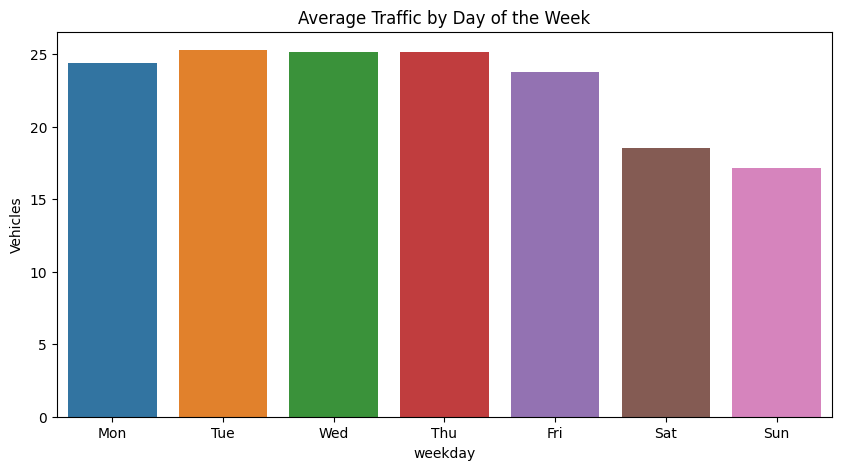

In [23]:
# Traffic by Day of the Week
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="weekday", y="Vehicles", estimator=np.mean, ci=None)
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.title("Average Traffic by Day of the Week")
plt.show()

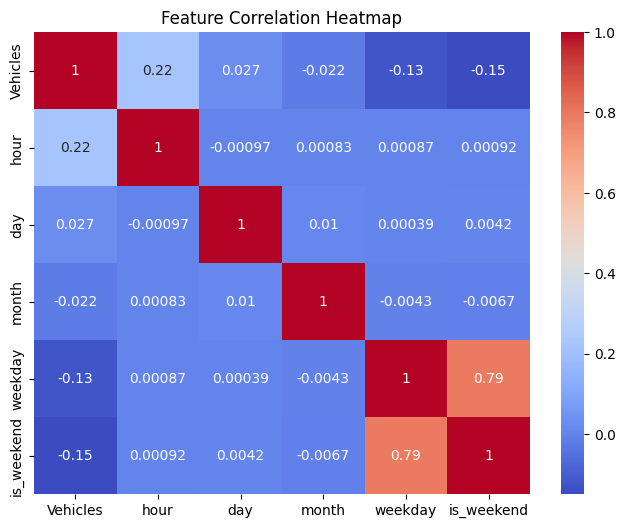

In [24]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[["Vehicles", "hour", "day", "month", "weekday", "is_weekend"]].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [25]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split



In [26]:
df.head()

,DateTime,Junction,Vehicles,hour,day,month,weekday,is_weekend,Vehicles_last_hour,Vehicles_last_24_hours,rolling_avg_7days
29192,2015-11-01 08:00:00,3,3,8,1,11,6,1,4.0,15.0,5.000000
8,2015-11-01 08:00:00,1,11,8,1,11,6,1,3.0,6.0,6.142857
14600,2015-11-01 08:00:00,2,3,8,1,11,6,1,11.0,9.0,5.285714
29193,2015-11-01 09:00:00,3,6,9,1,11,6,1,3.0,7.0,5.571429
9,2015-11-01 09:00:00,1,12,9,1,11,6,1,6.0,13.0,6.142857


In [27]:
# Select relevant features for LSTM input
features = ["Vehicles", "hour", "day", "month", "weekday", "is_weekend", 
            "Vehicles_last_hour", "Vehicles_last_24_hours", "rolling_avg_7days"]
target = "Vehicles"

# Normalize data
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])


In [28]:
def create_sequences(data, target_col, seq_length=24):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i+seq_length][features].values)
        y.append(data.iloc[i+seq_length][target_col])
    return np.array(X), np.array(y)

SEQ_LENGTH = 24  # Use past 24 hours to predict next hour
X, y = create_sequences(df, target, SEQ_LENGTH)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [29]:
# Define LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(SEQ_LENGTH, len(features))),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dense(16, activation="relu"),
    Dense(1)  # Output layer
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model.compile(optimizer="adam", loss="mse")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 24, 64)              │          18,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,905 (124.63 KB)

 Trainable params: 31,905 (124.63 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)


Epoch 1/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0096 - val_loss: 0.0212
Epoch 2/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0085 - val_loss: 0.0183
Epoch 3/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0079 - val_loss: 0.0183
Epoch 4/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0076 - val_loss: 0.0178
Epoch 5/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0075 - val_loss: 0.0179
Epoch 6/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0073 - val_loss: 0.0179
Epoch 7/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0073 - val_loss: 0.0177
Epoch 8/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0071 - val_loss: 0.0175
Epoch 9/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0072 - val_loss: 0.0175
Epoch 10/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0069 - val_loss: 0.0165
Epoch 11/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0069 - val_loss: 0.0169
Epoch 12/20
1202/1202 ━━━━━━━

301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


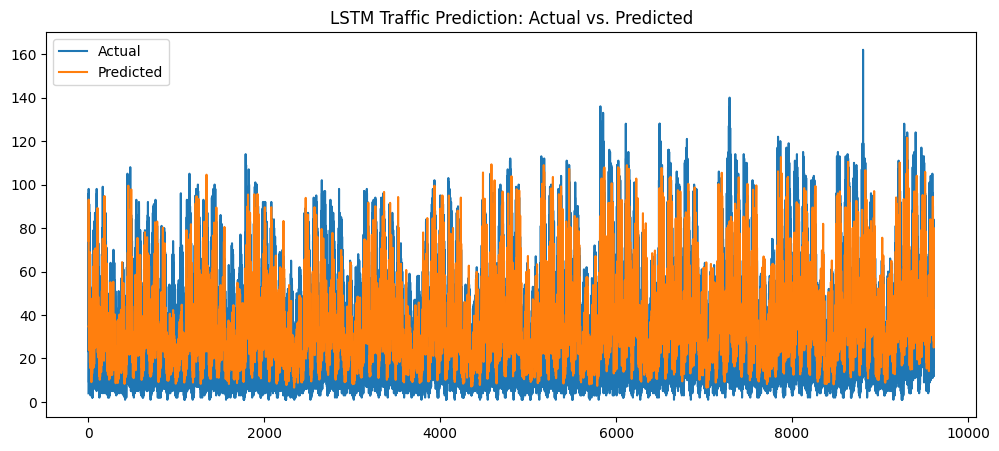

In [32]:
# Predict on test set
y_pred = model.predict(X_test)

# Rescale back to original values
y_test_rescaled = scaler.inverse_transform(np.column_stack([y_test] + [np.zeros((len(y_test), len(features)-1))]))[:,0]
y_pred_rescaled = scaler.inverse_transform(np.column_stack([y_pred.flatten()] + [np.zeros((len(y_pred), len(features)-1))]))[:,0]

# Plot actual vs predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.plot(y_test_rescaled, label="Actual")
plt.plot(y_pred_rescaled, label="Predicted")
plt.legend()
plt.title("LSTM Traffic Prediction: Actual vs. Predicted")
plt.show()
